# Týden 7. Strojové učení s dohledem.

Učení s dohledem je typ strojového učení, kdy je model trénován na označených datech. Model provádí předpovědi nebo rozhodnutí na základě vstupních dat a je opravován, pokud jsou jeho předpovědi nesprávné.

Klíčové vlastnosti:
- Označená data: Trénovací data obsahují jak vstupní data, tak odpovídající očekávaný výstup.
- Fáze trénování: Algoritmus se učí z trénovacích dat minimalizací ztrátové funkce.
- Fáze testování: Model je vyhodnocen na jiné sadě označených dat, aby se otestovala jeho přesnost predikce.
- Výstupní proměnná (cíl): Cílem je předpovědět výstupní proměnnou na základě jedné nebo více vstupních funkcí.
- Typy problémů: Obecně se používají pro klasifikační a regresní problémy.

V tomto cvičení vyzkoušíme několik modelů učení pod dohledem pomocí balíčku Scikit-learn.

### Pip

```
pip install -U scikit-learn
```

### Conda

```
conda create -n sklearn-env -c conda-forge scikit-learn
conda activate sklearn-env
```

## Lineární regrese

Lineární regrese fituje lineární model s koeficienty $w = (w_1, \dots, w_p)$
tak, aby minimalizoval reziduální součet čtverců mezi pozorovanými cíli v souboru dat a cíli předpovězenými lineární aproximací. Matematicky řeší problém ve tvaru:
$$\min_{w}||Xw-y||_2^2$$

Nejdřív z balíčku sklearn naimportujeme potřebné funkce a taky numpy a matplotlib:

In [ ]:
a = 2

In [ ]:
from sklearn import linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
import numpy as np

: 

Otestujeme to na námi vytvořených datech, které vytvoříme tak, že k lineárnímu trendu přičteme Gaussův šum:

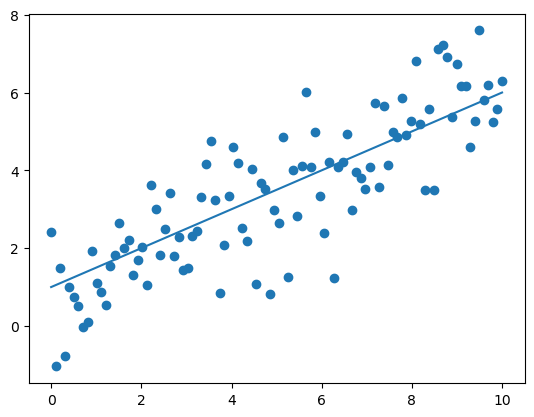

In [ ]:
x = np.linspace(0, 10, 100)
y_truth = 1 + 0.5 * x 
y_noise = y_truth + np.random.randn(100)

plt.plot(x, y_truth)
plt.scatter(x, y_noise)

Nejdřive náhodně rozdělíme data na trénovácí a testovácí:

In [17]:
index_test = np.random.choice(np.arange(100), 80, replace=False)
index_train = np.setdiff1d(np.arange(100), index_test)
x_test = x[index_test, np.newaxis]
x_train = x[index_train, np.newaxis]
y_test = y_noise[index_test, np.newaxis]
y_train = y_noise[index_train, np.newaxis]

Vytvoříme objekt lineární regrese a trénujeme model pomocí trénovacích sady:

In [19]:
model = linear_model.LinearRegression(fit_intercept=True)
model.fit(x_train, y_train)
model.coef_

array([[0.59815247]])

Proveďme předpověď na testovací sadě:


In [9]:
y_pred = model.predict(diabetes_X_test)

14

Nechcete však mít index značky `<title>`. Chcete index samotného nadpisu. Chcete-li získat index prvního písmene v nadpisu, můžete k title_index přičíst délku řetězce `"<title>"`:

In [10]:
start_index = title_index + len("<title>")
start_index

21

Nyní získáte index uzavírací značky `</title>` předáním řetězce `"</title>"` příkazu `.find()`:

In [11]:
end_index = html.find("</title>")
end_index

39

Nakonec můžete název extrahovat rozřezáním řetězce html:

In [12]:
title = html[start_index:end_index]
title

'Profile: Aphrodite'

HTML v reálném světě může být mnohem složitější a mnohem méně předvídatelné než HTML na stránce profilu Aphrodite. Zde je další profilová stránka s trochu chaotičtějším HTML, kterou můžete seškrábat:

In [14]:
url = "http://olympus.realpython.org/profiles/poseidon"
page = urlopen(url)
html = page.read().decode("utf-8")
start_index = html.find("<title>") + len("<title>")
end_index = html.find("</title>")
title = html[start_index:end_index]
title

'\n<head>\n<title >Profile: Poseidon'

Ups! Do názvu se přimíchalo trochu HTML. Proč?

HTML stránky /profiles/poseidon vypadá podobně jako stránka /profiles/aphrodite, ale je tu malý rozdíl. Úvodní značka `<title>` má před uzavírací úhlovou závorkou (`>`) mezeru navíc, což ji vykresluje jako `<title >`. 
Funkce `html.find("<title>")` vrátí `-1`, protože přesný podřetězec `"<title>"` neexistuje. Po přičtení `-1` k `len("<title>")`, což je `7`, se proměnné `start_index` přiřadí hodnota `6`.
Znak na indexu `6` řetězce html je znak nového řádku `(\n)` těsně před úvodní úhlovou závorkou (`<`) značky `<head>`. To znamená, že `html[start_index:end_index]` vrátí celé HTML začínající tímto novým řádkem a končící těsně před značkou `</title>`.
K problémům tohoto druhu může dojít nespočtem nepředvídatelných způsobů. Potřebujete spolehlivější způsob extrakce textu z jazyka HTML.

## Balíček re

Regulární výrazy - zkráceně regexy (od angl. regular expressions) - jsou vzory, které můžete použít k vyhledávání textu v řetězci. Python podporuje regulární výrazy prostřednictvím modulu `re` standardní knihovny.

Chcete-li pracovat s regulárními výrazy, musíte nejprve importovat modul `re`:

In [15]:
import re

Regulární výrazy používají k označení různých vzorů speciální znaky zvané metaznaky. Například znak hvězdičky (`*`) označuje nula nebo více výskytů toho, co je těsně před hvězdičkou.

V následujícím příkladu použijete funkci `.findall()` k nalezení libovolného textu v řetězci, který odpovídá zadanému regulárnímu výrazu:

In [16]:
re.findall("ab*c", "ac")

['ac']

Prvním argumentem příkazu `re.findall()` je regulární výraz, který chcete porovnat, a druhým argumentem je řetězec, který se má testovat. Ve výše uvedeném příkladu hledáte vzor `"ab*c"` v řetězci `"ac"`.

Regulární výraz `"ab*c"` odpovídá jakékoli části řetězce, která začíná písmenem `"a"`, končí písmenem `"c"` a mezi nimiž je nula nebo více výskytů písmene `"b"`. `re.findall()` vrátí seznam všech shod. Řetězec `"ac"` odpovídá tomuto vzoru, takže je vrácen v seznamu.

Zde je stejný vzor aplikován na různé řetězce:

In [17]:
print(re.findall("ab*c", "abcd"))
print(re.findall("ab*c", "acc"))
print(re.findall("ab*c", "abcac"))
print(re.findall("ab*c", "abdc"))

['abc']
['ac']
['abc', 'ac']
[]


Všimněte si, že pokud není nalezena žádná shoda, funkce `.findall()` vrátí prázdný seznam.

Při porovnávání vzorů se rozlišují malá a velká písmena. Pokud chcete tento vzor porovnat bez ohledu na velikost písmen, můžete předat třetí argument s hodnotou `re.IGNORECASE`:

In [18]:
re.findall("ab*c", "ABC", re.IGNORECASE)

['ABC']

Tečkou `(.)` můžete v regulárním výrazu označit jakýkoli jednotlivý znak. Například můžete najít všechny řetězce, které obsahují písmena `"a"` a `"c"` oddělená jedním znakem, takto:

In [19]:
re.findall("a.c", "abc")

['abc']

Vzor `.*` uvnitř regulárního výrazu znamená libovolný znak opakovaný libovolný početkrát. Například pomocí `"a.*c"` můžete najít každý podřetězec začínající písmenem `"a"` a končící písmenem `"c"` bez ohledu na to, které písmeno nebo písmena se nacházejí mezi nimi:

In [20]:
re.findall("a.*c", "abbc")

['abbc']

Funkce `re.search()` se často se používá k hledání určitého vzoru uvnitř řetězce. Tato funkce je poněkud složitější než `re.findall()`, protože vrací objekt nazvaný `MatchObject`, který uchovává různé skupiny dat. To proto, že uvnitř jiných shod mohou být shody a funkce `re.search()` vrací všechny možné výsledky.

Podrobnosti o objektu MatchObject nejsou zde podstatné. Prozatím stačí vědět, že volání `.group()` na `MatchObject` vrátí první a nejobsáhlejší výsledek, což je ve většině případů přesně to, co chcete:

In [21]:
match_results = re.search("ab*c", "ABC", re.IGNORECASE)
match_results.group()

'ABC'

V modulu re je ještě jedna funkce, která je užitečná pro analýzu textu. `re.sub()`, což je zkratka pro substitute, umožňuje nahradit text v řetězci, který odpovídá regulárnímu výrazu, novým textem. Chová se podobně jako řetězcová metoda `.replace()`.

Argumenty předávané funkci `re.sub()` jsou regulární výraz, za nímž následuje nahrazovaný text a za ním řetězec. Zde je příklad:

In [22]:
string = "Everything is <replaced> if it's in <tags>."
string = re.sub("<.*>", "ELEPHANTS", string)
string

'Everything is ELEPHANTS.'

Funkce `re.sub()` používá regulární výraz `"<.*>"` k nalezení a nahrazení všeho mezi prvním `<` a posledním `>`, což se rozprostírá od začátku `<replaced>` do konce `<tags>`. Je to proto, že regulární výrazy jazyka Python jsou chamtivé, což znamená, že se snaží najít co nejdelší shodu, pokud jsou použity znaky jako `*`.

Alternativně můžete použít vzor shody `*?`, který funguje stejně jako `*` s tím rozdílem, že odpovídá nejkratšímu možnému řetězci textu:

In [24]:
string = "Everything is <replaced> if it's in <tags>."
string = re.sub("<.*?>", "ELEPHANTS", string)
string

"Everything is ELEPHANTS if it's in ELEPHANTS."

Tentokrát funkce `re.sub()` najde dvě shody, `<replaced>` a `<tags>`, a nahradí obě shody řetězcem `"ELEPHANTS"`.

## Extrakce textu z HTML pomocí regulárních výrazů
Vybaveni těmito znalostmi se nyní pokuste získat nadpis z jiné profilové stránky, která obsahuje tento poněkud nedbale napsaný řádek HTML:

In [25]:
import re
from urllib.request import urlopen

url = "http://olympus.realpython.org/profiles/dionysus"
page = urlopen(url)
html = page.read().decode("utf-8")

pattern = "<title.*?>.*?</title.*?>"
match_results = re.search(pattern, html, re.IGNORECASE)
title = match_results.group()
title = re.sub("<.*?>", "", title) # Remove HTML tags

print(title)

Profile: Dionysus


## Použití parseru HTML pro škrabání webu v jazyce Python
Ačkoli jsou regulární výrazy obecně skvělé pro porovnávání vzorů, někdy je jednodušší použít parser HTML, který je výslovně určen pro parsování stránek HTML. Pro tento účel je napsáno mnoho nástrojů v jazyce Python, ale pro začátek je vhodné použít knihovnu [Beautiful Soup]().
```
pip install beautifulsoup4
```

In [26]:
from bs4 import BeautifulSoup
from urllib.request import urlopen

url = "http://olympus.realpython.org/profiles/dionysus"
page = urlopen(url)
html = page.read().decode("utf-8")
soup = BeautifulSoup(html, "html.parser")

Tento program dělá tři věci:

1. Otevře adresu URL http://olympus.realpython.org/profiles/dionysus pomocí funkce `urlopen()` z modulu `urllib.request`.
2. Přečte HTML ze stránky jako řetězec a přiřadí jej do proměnné `html`.
3. Vytvoří objekt `BeautifulSoup` a přiřadí jej do proměnné `soup`.

Objekt BeautifulSoup přiřazený proměnné soup je vytvořen se dvěma argumenty. Prvním argumentem je HTML, které má být zpracováno, a druhý argument, řetězec "html.parser", říká objektu, který parser má být použit v zákulisí. "html.parser" představuje vestavěný parser jazyka HTML v jazyce Python.

Objekty BeautifulSoup mají metodu `.get_text()`, kterou můžete použít k extrakci veškerého textu z dokumentu a automatickému odstranění všech značek HTML.

In [27]:
print(soup.get_text())



Profile: Dionysus





Name: Dionysus

Hometown: Mount Olympus

Favorite animal: Leopard 

Favorite Color: Wine






V tomto výstupu je mnoho prázdných řádků. Ty jsou výsledkem znaků nového řádku v textu dokumentu HTML. V případě potřeby je můžete odstranit pomocí řetězcové metody `.replace()`.

Často potřebujete z dokumentu HTML získat pouze konkrétní text. Pomocí Beautiful Soup nejprve extrahovat text a poté použít řetězcovou metodu `.find()` je někdy jednodušší než práce s regulárními výrazy.

Jindy jsou však prvky, které upozorňují na data, která chcete načíst, samotné značky HTML. Možná budete chtít například získat adresy URL všech obrázků na stránce. Tyto odkazy jsou obsaženy v atributu src HTML tagů `<img>`.

V tomto případě můžete pomocí `find_all()` vrátit seznam všech instancí této konkrétní značky:

In [28]:
soup.find_all("img")

[<img src="/static/dionysus.jpg"/>, <img src="/static/grapes.png"/>]

Tím se vrátí seznam všech značek `<img>` v dokumentu HTML. Objekty v seznamu vypadají, jako by to mohly být řetězce představující značky, ale ve skutečnosti jsou to instance objektu Tag, který poskytuje Beautiful Soup. Objekty značek poskytují jednoduché rozhraní pro práci s informacemi, které obsahují.

Můžete to trochu prozkoumat tak, že nejprve rozbalíte objekty značek ze seznamu:

In [29]:
image1, image2 = soup.find_all("img")

Každý objekt `Tag` má vlastnost `.name`, která vrací řetězec obsahující typ značky HTML:

In [30]:
image1.name

'img'

K atributům HTML objektu Tag můžete přistupovat tak, že jejich názvy vložíte do hranatých závorek, stejně jako by atributy byly klíče ve slovníku.

Například značka `<img src="/static/dionysus.jpg"/>` má jeden atribut, `src`, s hodnotou `"/static/dionysus.jpg"`. Podobně značka HTML, jako je odkaz `<a href="https://realpython.com" target="_blank">`, má dva atributy, href a target.

Chcete-li získat zdroj obrázků na stránce profilu Dionýsa, získáte přístup k atributu src pomocí výše uvedeného slovníkového zápisu:

In [31]:
print(image1["src"])
print(image2["src"])

/static/dionysus.jpg
/static/grapes.png


K určitým značkám v dokumentech HTML lze přistupovat pomocí vlastností objektu `Tag`. Chcete-li například v dokumentu získat značku `<title>`, můžete použít vlastnost `.title`:

In [32]:
soup.title

<title>Profile: Dionysus</title>

Pokud se podíváte na zdroj profilu Dionýsa tak, že přejdete na stránku profilu, kliknete pravým tlačítkem na stránku a vyberete Zobrazit zdroj stránky, všimnete si, že značka `<title>` je napsána velkými písmeny s mezerami. Beautiful Soup automaticky vyčistí štítky za vás odstraněním nadbytečné mezery v úvodním štítku a přebytečného lomítka (/) v závěrečném štítku.

Můžete také načíst pouze řetězec mezi tagy title pomocí vlastnosti `.string` objektu `Tag`:

In [33]:
soup.title.string

'Profile: Dionysus'

Jednou z funkcí Beautiful Soup je schopnost vyhledávat konkrétní druhy značek, jejichž atributy odpovídají určitým hodnotám. Pokud například chcete najít všechny značky `<img>`, které mají atribut src rovný hodnotě `/static/dionysus.jpg`, můžete pro `.find_all()` zadat následující další argument:

In [34]:
soup.find_all("img", src="/static/dionysus.jpg")

[<img src="/static/dionysus.jpg"/>]

Tento příklad je poněkud libovolný a užitečnost této techniky nemusí být z příkladu zřejmá. Pokud strávíte nějaký čas procházením různých webů a prohlížením jejich zdrojů stránek, pak si všimnete, že mnoho webů má extrémně komplikované HTML struktury.

Když stahujete data z webů pomocí Pythonu, často vás zajímají konkrétní části stránky. Když strávíte nějaký čas prohlížením dokumentu HTML, můžete identifikovat značky s jedinečnými atributy, které můžete použít k extrahování potřebných dat.

Potom místo toho, abyste se spoléhali na komplikované regulární výrazy nebo používali `.find()` k prohledávání dokumentu, můžete přímo přistupovat ke konkrétní značce, která vás zajímá, a extrahovat data, která potřebujete.

## Práce s formuláři

Modul urllib, se kterým jste dosud pracovali v tomto cvičení, se dobře hodí pro vyžádání obsahu webové stránky. Někdy však potřebujete interakci s webovou stránkou, abyste získali požadovaný obsah. Například budete možná muset odeslat formulář nebo kliknout na tlačítko pro zobrazení skrytého obsahu.

Standardní knihovna Pythonu neposkytuje vestavěné prostředky pro interaktivní práci s webovými stránkami, ale z PyPI je k dispozici mnoho balíčků třetích stran. Mezi nimi je [MechanicalSoup](https://mechanicalsoup.readthedocs.io/en/stable/), oblíbený a relativně jednoduchý balíček k použití.

```
python -m pip install MechanicalSoup
```

MechanicalSoup v podstatě nainstaluje to, co je známé jako bezhlavý prohlížeč (headless browser), což je webový prohlížeč bez grafického uživatelského rozhraní. Tento prohlížeč je ovládán programově pomocí Pythonu.

Objekty `Browser` představují webový prohlížeč bez hlavy.

In [2]:
import mechanicalsoup
browser = mechanicalsoup.Browser()

Můžete je použít k vyžádání stránky z internetu předáním adresy URL jejich metodě `.get()`:

In [2]:
url = "http://olympus.realpython.org/login"
page = browser.get(url)

`page` je objekt `Response`, který ukládá odpověď z požadavku na URL z prohlížeče:

In [3]:
page

<Response [200]>

Číslo `200` představuje stavový kód vrácený požadavkem. Stavový kód `200` znamená, že požadavek byl úspěšný. U neúspěšného požadavku se může zobrazit stavový kód `404`, pokud adresa URL neexistuje, nebo `500`, pokud při zadávání požadavku došlo k chybě serveru.

MechanicalSoup používá Beautiful Soup k analýze HTML z požadavku a stránka má atribut `.soup`, který představuje objekt BeautifulSoup:

In [4]:
type(page.soup)

bs4.BeautifulSoup

HTML můžete zobrazit kontrolou atributu .soup:

In [5]:
page.soup

<html>
<head>
<title>Log In</title>
</head>
<body bgcolor="yellow">
<center>
<br/><br/>
<h2>Please log in to access Mount Olympus:</h2>
<br/><br/>
<form action="/login" method="post" name="login">
Username: <input name="user" type="text"/><br/>
Password: <input name="pwd" type="password"/><br/><br/>
<input type="submit" value="Submit"/>
</form>
</center>
</body>
</html>

Všimněte si, že tato stránka obsahuje `<form>` s prvky `<input>` pro uživatelské jméno a heslo.

Důležitou částí HTML kódu je přihlašovací formulář – tedy vše uvnitř značek `<form>`. `<form>` na této stránce má atribut name nastaven na přihlášení. Tento formulář obsahuje dva prvky `<input>`, jeden s názvem `user` a druhý s názvem `pwd`. Třetím prvkem `<input>` je tlačítko `Odeslat`.

Nyní, když znáte základní strukturu přihlašovacího formuláře, stejně jako přihlašovací údaje potřebné k přihlášení, podívejte se na program, který formulář vyplní a odešle.

In [1]:
# 1
browser = mechanicalsoup.Browser()
url = "http://olympus.realpython.org/login"
login_page = browser.get(url)
login_html = login_page.soup

# 2
form = login_html.select("form")[0]
form.select("input")[0]["value"] = "zeus"
form.select("input")[1]["value"] = "ThunderDude"

# 3
profiles_page = browser.submit(form, login_page.url)

NameError: name 'mechanicalsoup' is not defined

Chcete-li potvrdit, že jste se úspěšně přihlásili, zadejte do interaktivního okna následující:

In [7]:
profiles_page.url

'http://olympus.realpython.org/profiles'

Nyní rozeberte výše uvedený příklad:

1. Vytvoříte instanci prohlížeče a použijete ji k vyžádání adresy URL http://olympus.realpython.org/login. HTML obsah stránky přiřadíte proměnné login_html pomocí vlastnosti .soup.

2. login_html.select("form") vrátí seznam všech prvků <form> na stránce. Protože stránka obsahuje pouze jeden prvek <form>, můžete k formuláři přistupovat načtením prvku na indexu 0 seznamu. Pokud je na stránce pouze jeden formulář, můžete také použít login_html.form. Další dva řádky vyberou vstupy uživatelského jména a hesla a nastaví jejich hodnotu na „zeus“ a „ThunderDude“.

3. Formulář odešlete pomocí browser.submit(). Všimněte si, že této metodě předáváte dva argumenty, objekt formuláře a URL stránky login_page, ke které přistupujete přes login_page.url.

**Poznámka**: Hackeři mohou používat automatizované programy, jako je ten výše, k hrubému vynucení přihlášení rychlým zkoušením mnoha různých uživatelských jmen a hesel, dokud nenajdou funkční kombinaci. 
Kromě toho, že je to vysoce nelegální, téměř všechny webové stránky vás v dnešní době zablokují a nahlásí vaši IP adresu, pokud uvidí, že děláte příliš mnoho neúspěšných požadavků, takže to nezkoušejte!

Nyní, když máte nastavenou proměnnou profiles_page, je čas programově získat adresu URL pro každý odkaz na stránce /profiles.

Chcete-li to provést, použijte znovu `.select()`, tentokrát předáním řetězce `"a"` k výběru všech kotevních prvků `<a>` na stránce:

In [8]:
links = profiles_page.soup.select("a")

Nyní můžete iterovat každý odkaz a vytisknout atribut `href`:

In [9]:
for link in links:
    address = link["href"]
    text = link.text
    print(f"{text}: {address}")

Aphrodite: /profiles/aphrodite
Poseidon: /profiles/poseidon
Dionysus: /profiles/dionysus


Adresy URL obsažené v každém atributu href jsou relativní adresy URL, které nejsou příliš užitečné, pokud k nim chcete později přejít pomocí MechanicalSoup. Pokud náhodou znáte úplnou adresu URL, můžete přiřadit část potřebnou k vytvoření úplné adresy URL.

V tomto případě je základní URL pouze `http://olympus.realpython.org`. Poté můžete zřetězit základní adresu URL s relativními adresami URL nalezenými v atributu `src`:

In [10]:
base_url = "http://olympus.realpython.org"
for link in links:
    address = base_url + link["href"]
    text = link.text
    print(f"{text}: {address}")

Aphrodite: http://olympus.realpython.org/profiles/aphrodite
Poseidon: http://olympus.realpython.org/profiles/poseidon
Dionysus: http://olympus.realpython.org/profiles/dionysus


## Komunikace s webovými stránkami v reálném čase
Někdy chcete mít možnost získat data v reálném čase z webové stránky, která nabízí neustále aktualizované informace. Otevřete svůj prohlížeč a přejděte na adresu URL http://olympus.realpython.org/dice:

Tato stránka `/dice` simuluje hod šestistěnnou kostkou a aktualizuje výsledek pokaždé, když obnovíte prohlížeč. Níže napíšete program, který opakovaně seškrábe stránku pro nový výsledek.

První věc, kterou musíte udělat, je určit, který prvek na stránce obsahuje výsledek hodu kostkou. Udělejte to nyní kliknutím pravým tlačítkem kdekoli na stránce a výběrem `Zobrazit zdroj stránky`. O něco více než v polovině kódu HTML je značka `<h2>`, která vypadá takto:

In [11]:
browser = mechanicalsoup.Browser()
page = browser.get("http://olympus.realpython.org/dice")
tag = page.soup.select("#result")[0]
result = tag.text

print(f"The result of your dice roll is: {result}")

The result of your dice roll is: 2


Tento příklad používá metodu `.select()` objektu BeautifulSoup k nalezení prvku s `id=result`. Řetězec `"#result"`, který předáte `.select()`, používá selektor CSS ID `#` k označení toho, že výsledek je hodnota `id`.

Chcete-li pravidelně získávat nový výsledek, budete muset vytvořit smyčku, která načte stránku v každém kroku. Takže vše pod řádkem `browser = mechanicsoup.Browser()` ve výše uvedeném kódu musí jít do těla smyčky.

V tomto příkladu chcete čtyři hody kostkou v desetisekundových intervalech. Chcete-li to provést, musí poslední řádek vašeho kódu říci Pythonu, aby pozastavil běh na deset sekund. Můžete to udělat pomocí `.sleep()` z časového modulu Pythonu. Metoda `.sleep()` přebírá jeden argument, který představuje dobu spánku v sekundách.

Zde je příklad, který ilustruje, jak funkce `sleep()` funguje:

In [12]:
import time

print("I'm about to wait for five seconds...")
time.sleep(5)
print("Done waiting!")

I'm about to wait for five seconds...
Done waiting!


Pro příklad hodu kostkou budete muset předat číslo 10 do režimu spánku (). Zde je aktualizovaný program:

In [14]:
browser = mechanicalsoup.Browser()

for i in range(4):
    page = browser.get("http://olympus.realpython.org/dice")
    tag = page.soup.select("#result")[0]
    result = tag.text
    print(f"The result of your dice roll is: {result}")
    time.sleep(10)

    # Wait 10 seconds if this isn't the last request
    if i < 3:
        time.sleep(10)

The result of your dice roll is: 2
The result of your dice roll is: 1
The result of your dice roll is: 1


Pomocí technik, jako je tato, můžete získávat data z webových stránek, které pravidelně aktualizují svá data. Měli byste si však být vědomi toho, že žádost o stránku několikrát v rychlém sledu může být považována za podezřelé nebo dokonce škodlivé použití webové stránky.

Důležité: Většina webových stránek publikuje dokument Podmínky použití. Často na něj najdete odkaz v patičce webu.

Než se pokusíte získat data z webové stránky, vždy si přečtěte tento dokument. Pokud nemůžete najít podmínky použití, zkuste kontaktovat vlastníka webu a zeptat se ho, zda má nějaké zásady týkající se objemu požadavků.

Nedodržení podmínek použití může mít za následek zablokování vaší IP adresy, takže buďte opatrní!

Je dokonce možné zřítit server s nadměrným počtem požadavků, takže si dokážete představit, že mnoho webových stránek má obavy z množství požadavků na svůj server! Při odesílání více žádostí na webovou stránku vždy zkontrolujte Podmínky použití a buďte ohleduplní.